2020 expenses: $ 11970.87
2020 income: $ 11983.7
2020 net gain: $ 12.83
2021 expenses: $ 25036.07
2021 income: $ 25073.6
2021 net gain: $ 37.53
2022 expenses: $ 33527.43
2022 income: $ 33055.82
2022 net gain: $ -471.61
2023 expenses: $ 1574.09
2023 income: $ 2314.0
2023 net gain: $ 739.91


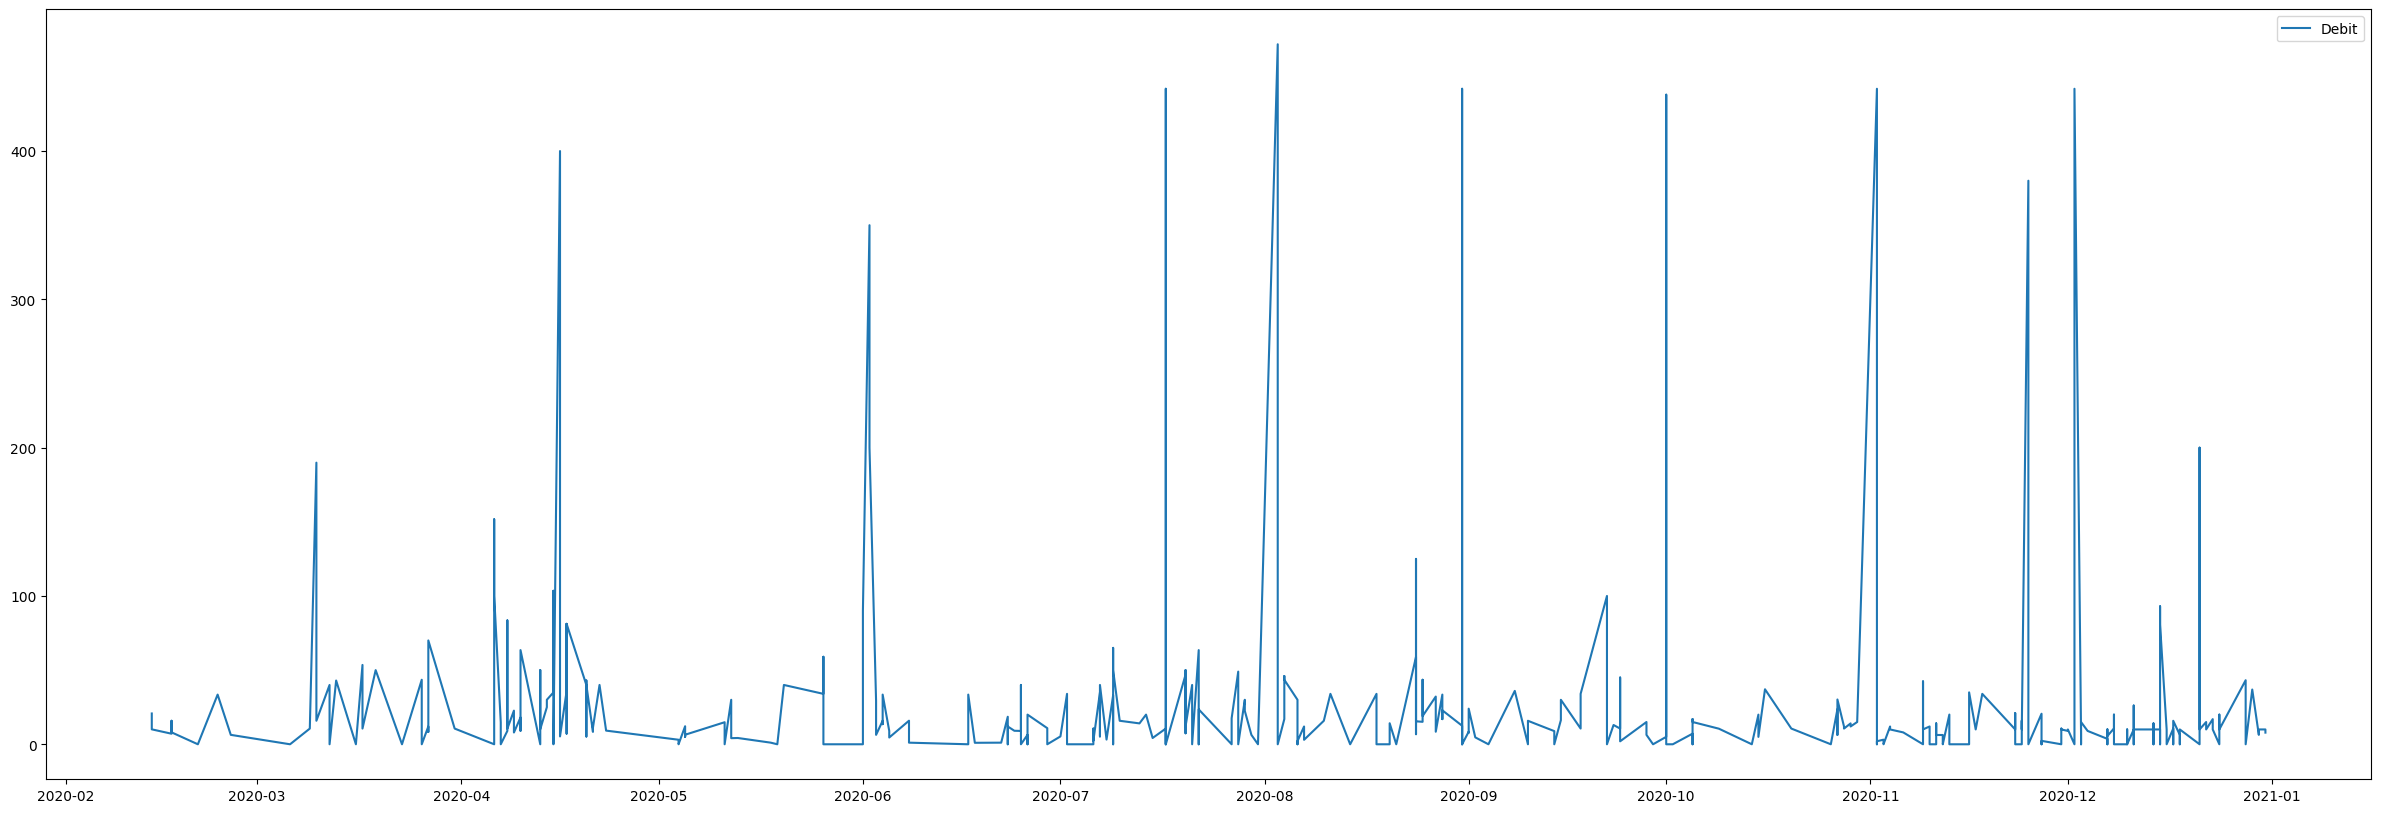

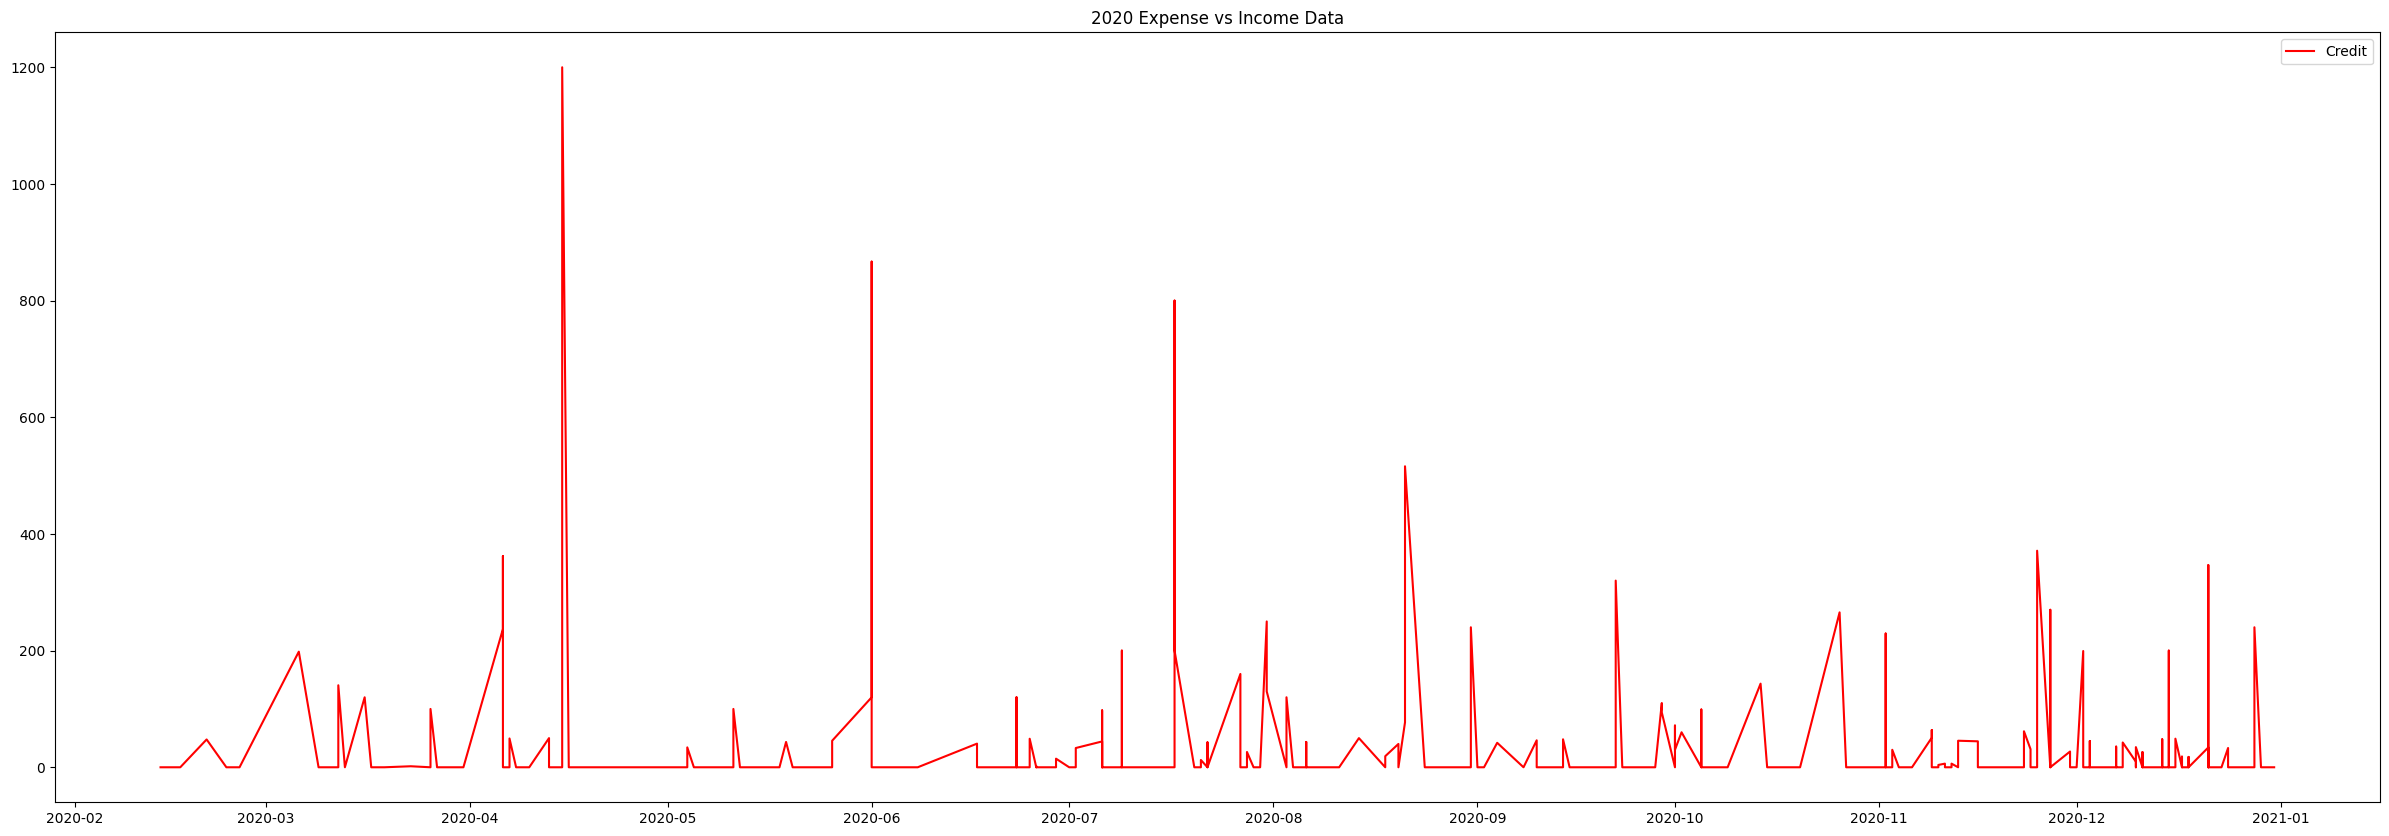

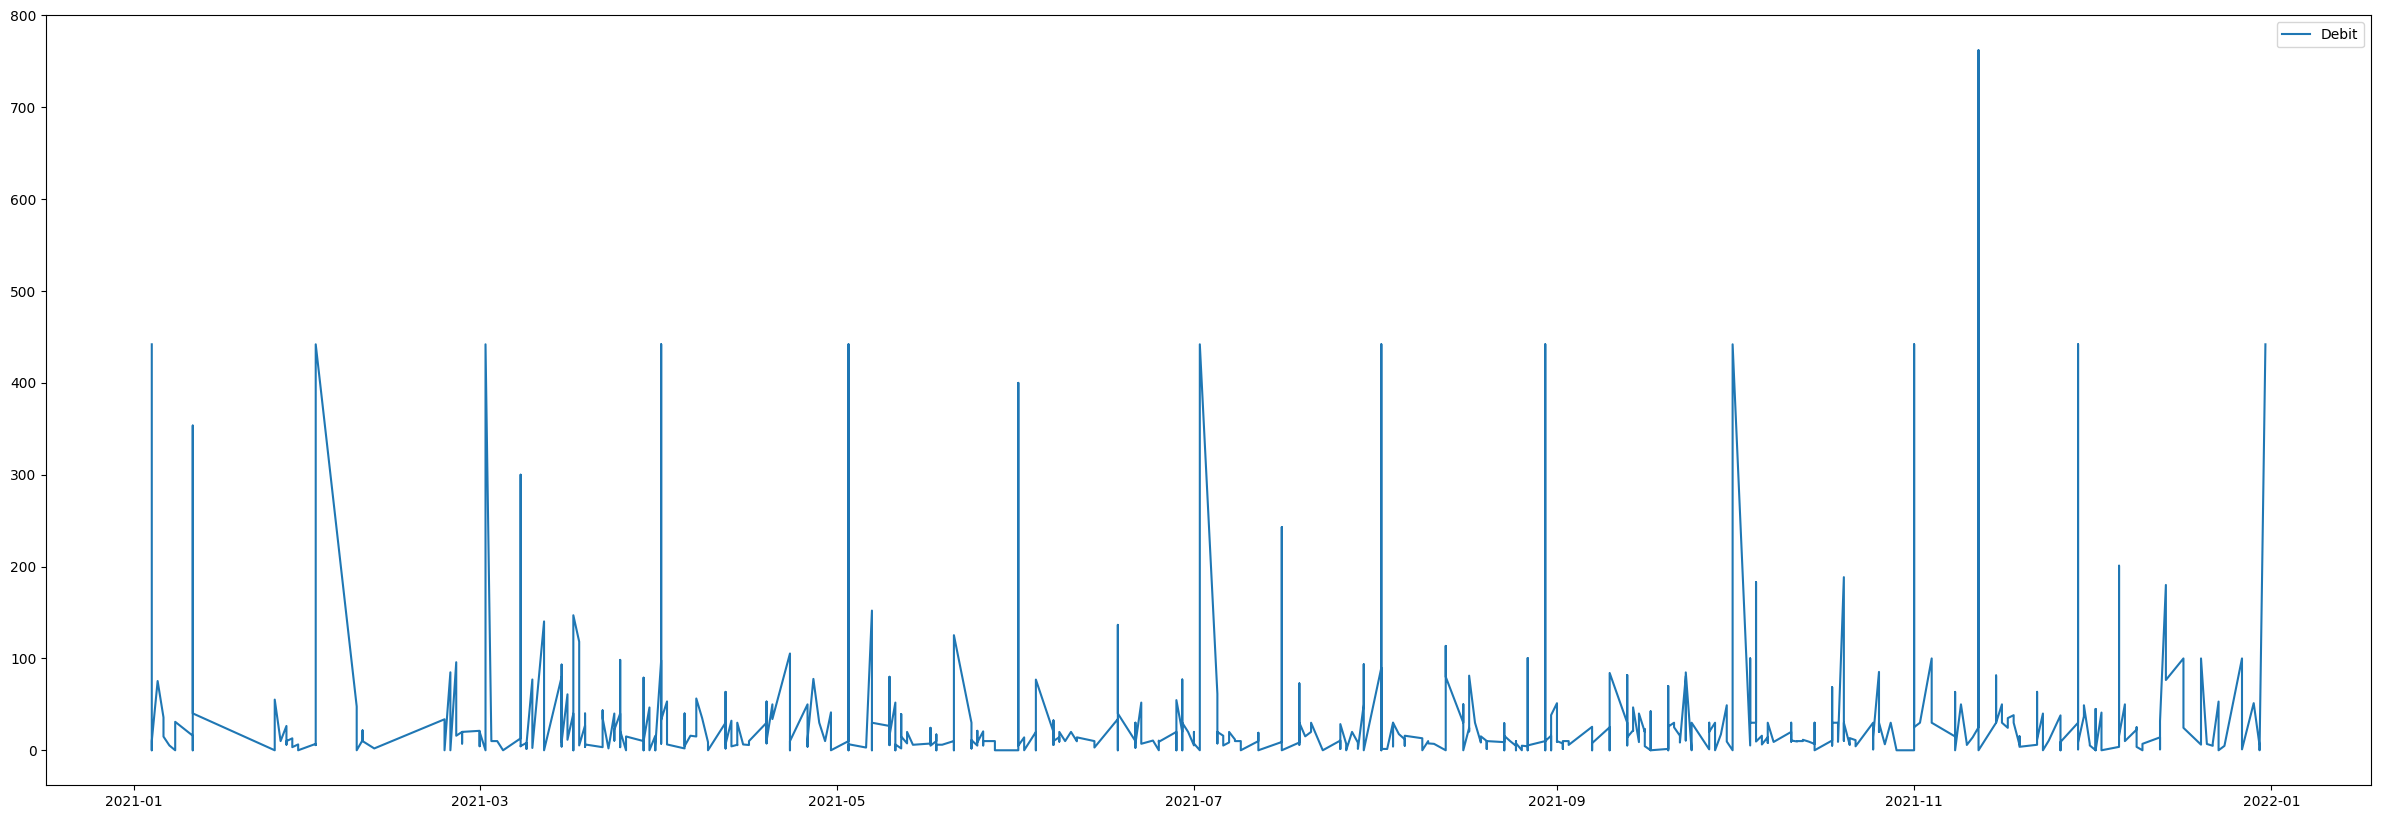

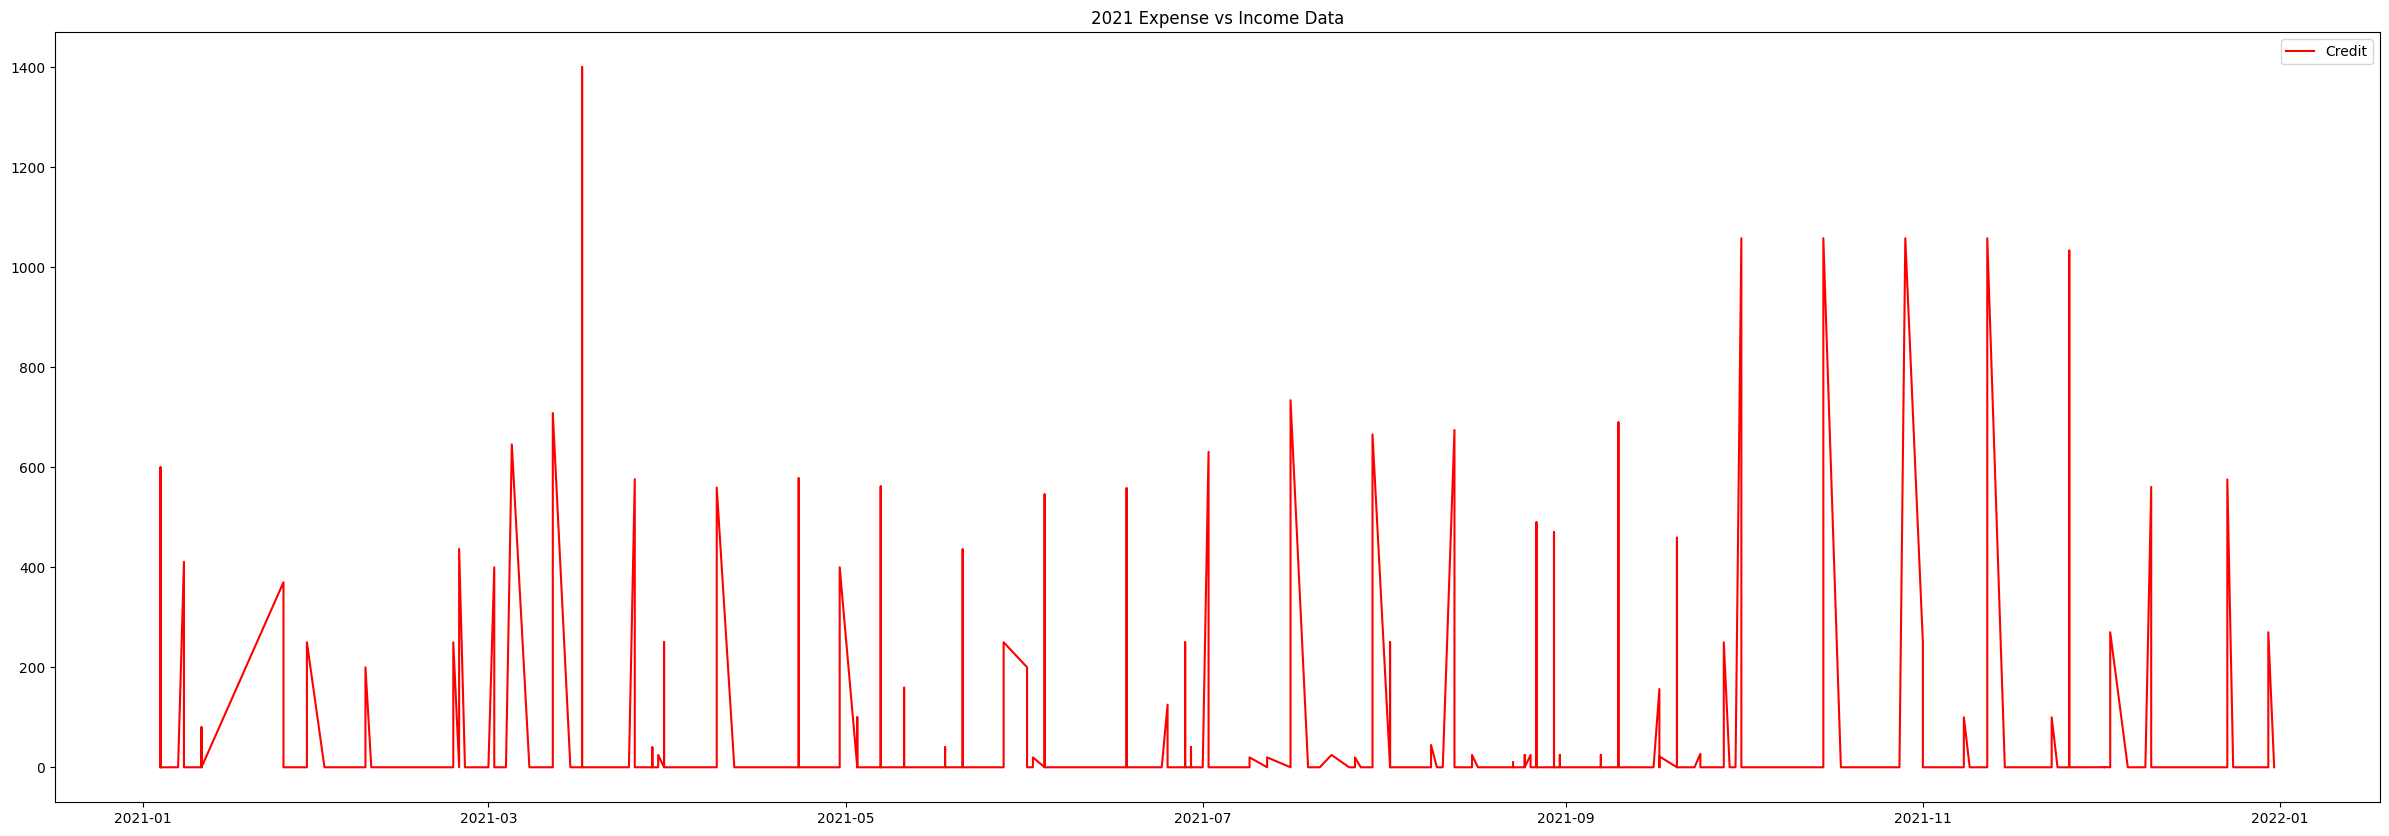

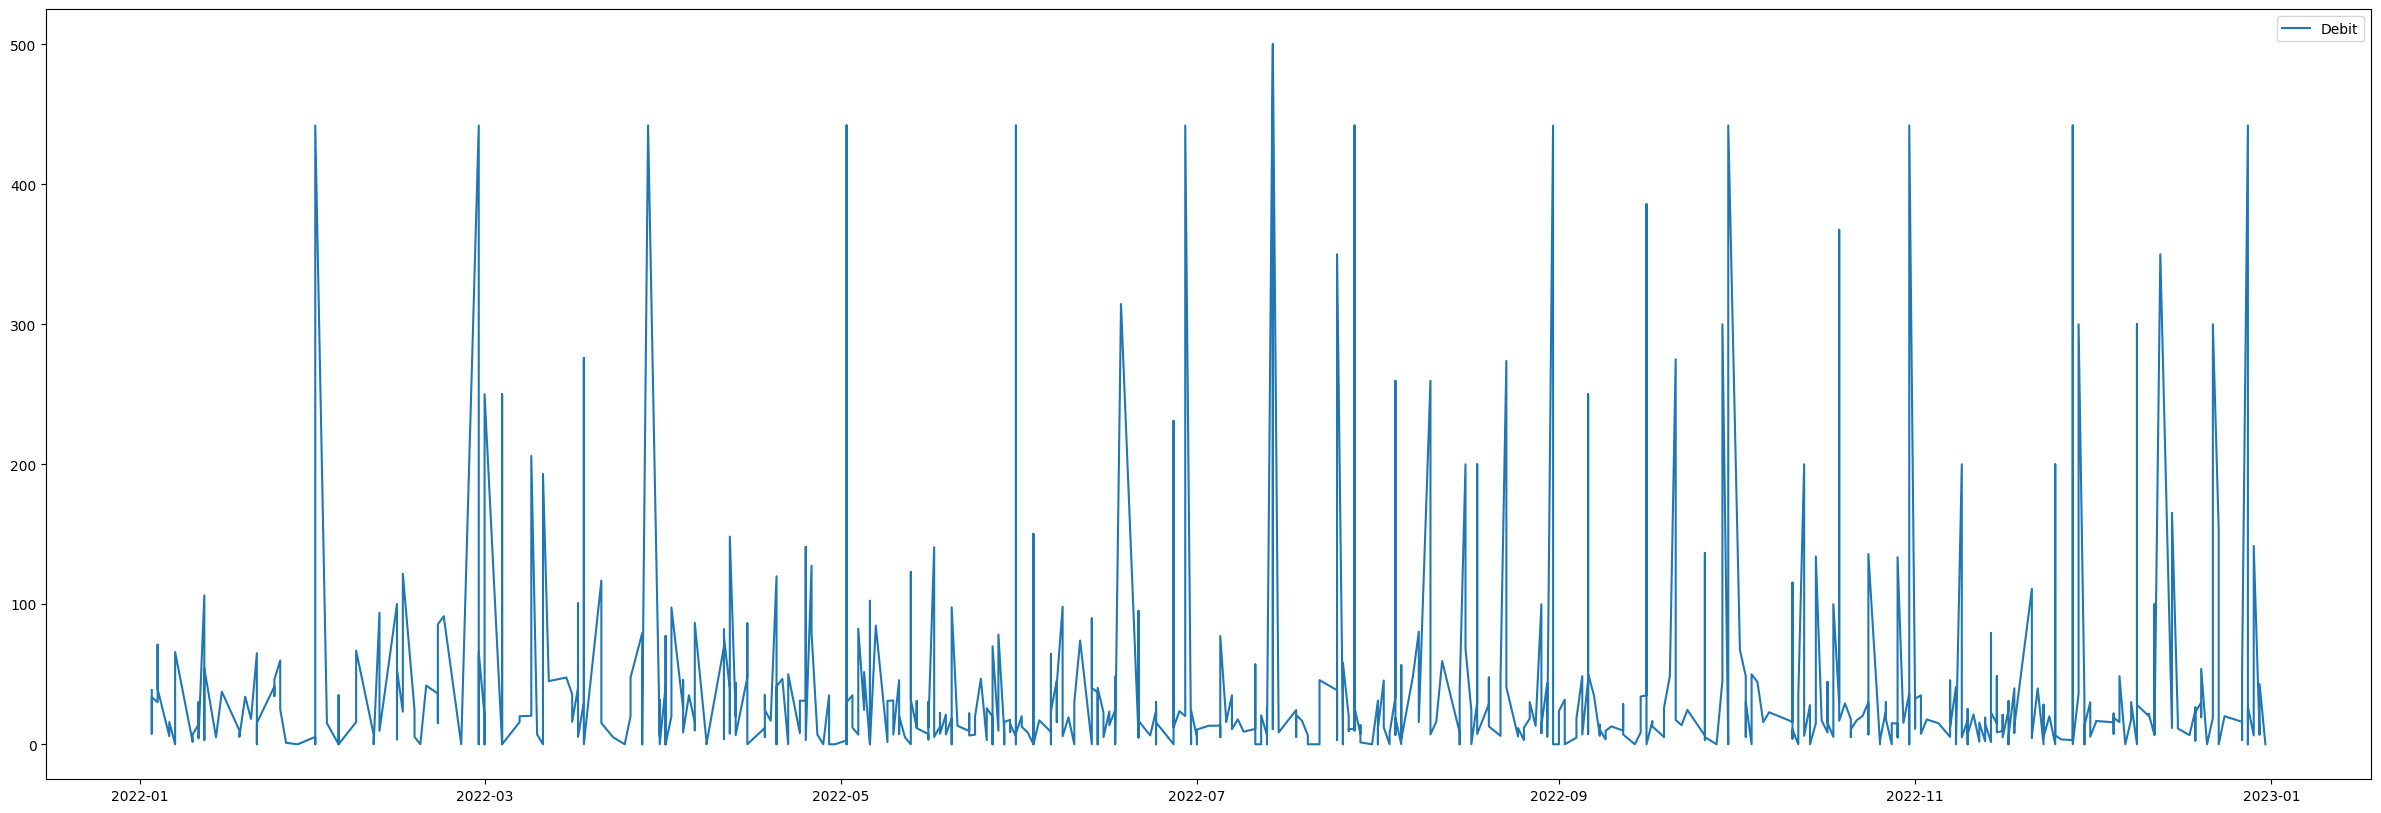

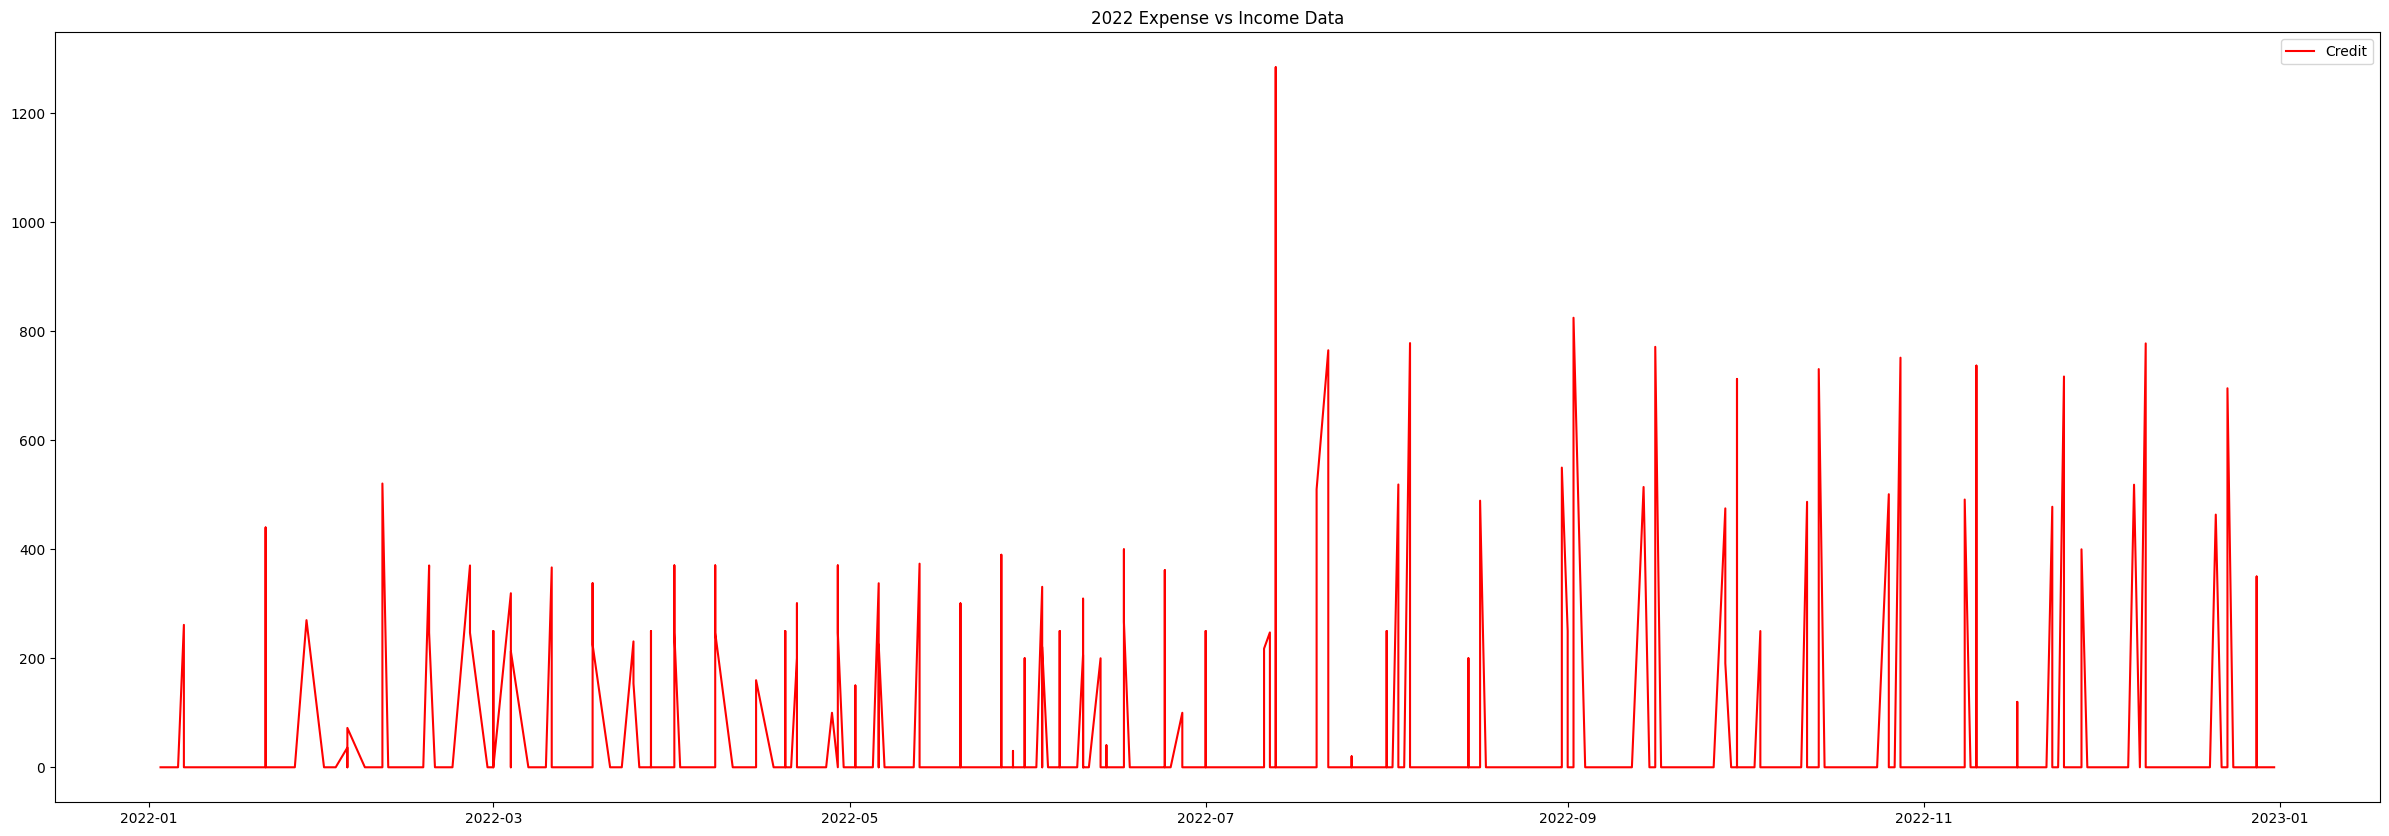

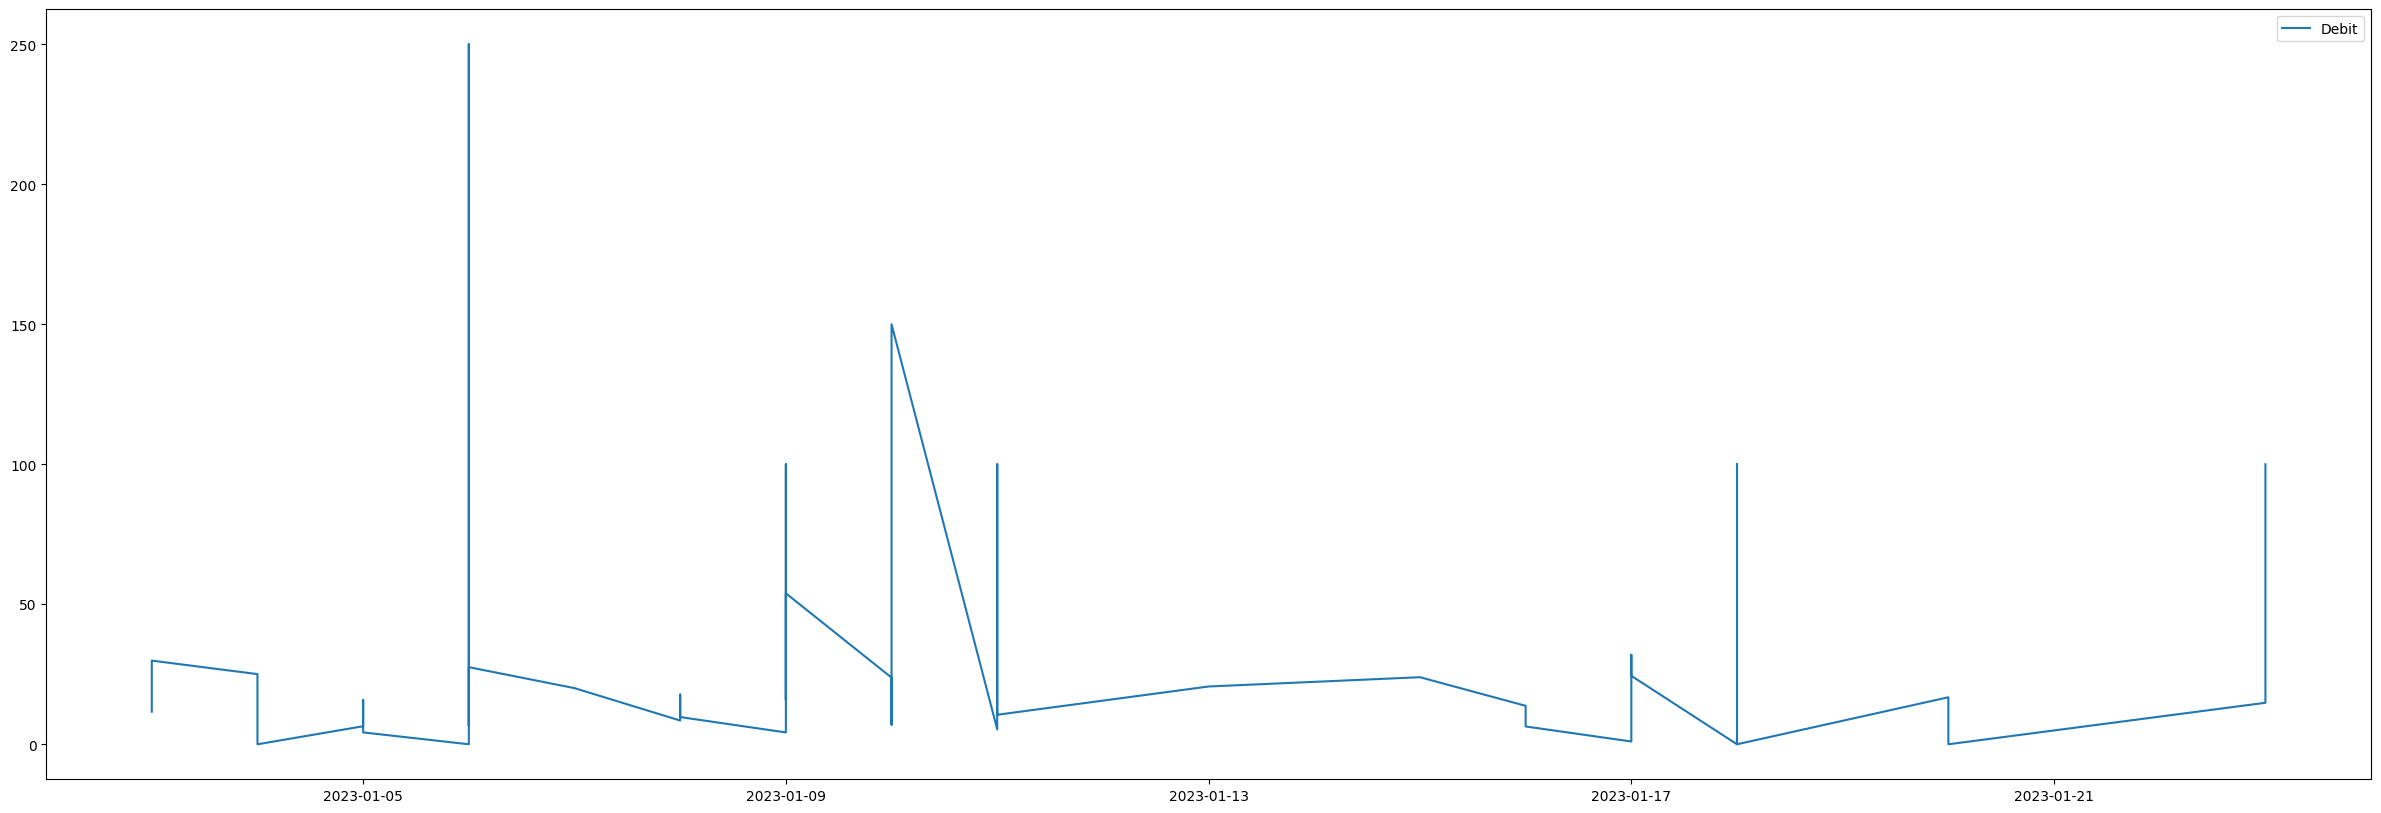

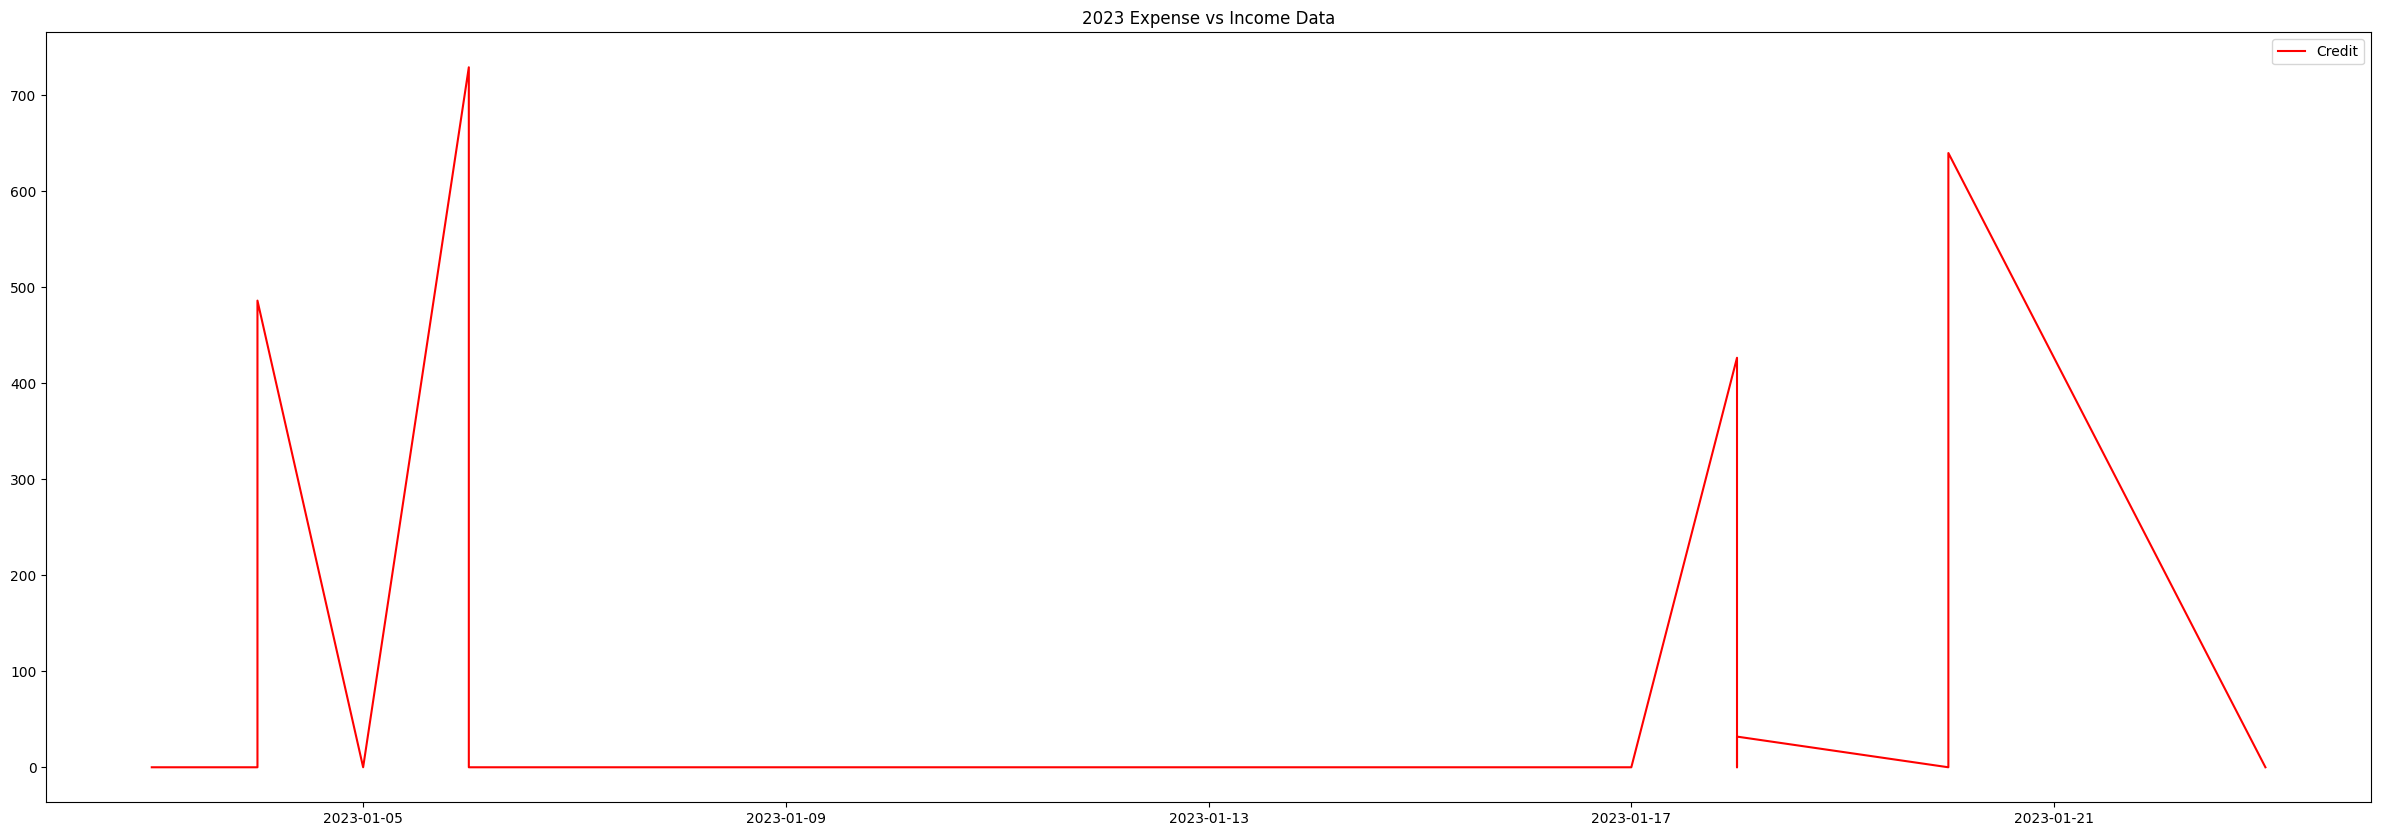

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# creating a method to get whitaker bank data
def get_data(year):
    # importing the csv files that house all the transactions
    transactions = pd.read_csv("Transactions-9562-2023-01-24.csv",
                                parse_dates=['Date'],
                                na_values=[0.00])

    # creating the pandas dataframe
    df = pd.DataFrame(transactions)

    # subsetting the data to remove unneeded columns
    df1 = df.iloc[1:, [2,3,5]]
    # adding a column to select all rows containing the year
    # returning all rows with the 'Year' column value for the specified year
    dates = df1['Date']
    df1['Year'] = pd.DatetimeIndex(dates).year


    return df1.loc[df1['Year'] == year]

# creating a method to get capital one bank data
def data(year):
    # importing the data
    transactions_ctd = pd.read_csv("2023-01-26_360Checking...4632.csv",
                                        parse_dates=['Transaction Date'],
                                        na_values=[0.00])

    # creating the dataframe for the Captial One bank account dataframe
    df_ctd = pd.DataFrame(transactions_ctd)
    df_ctd = df_ctd.iloc[1:, [1,2]]
    df_ctd_dates = df_ctd['Transaction Date']

    # adding the column year
    df_ctd['Year'] = pd.DatetimeIndex(df_ctd_dates).year

    # creating a credit and debit column to match the Whiaker Bank account dataframe
    df_ctd['Debit'] =  np.where(df_ctd['Transaction Amount'] < 0, np.abs(df_ctd['Transaction Amount']), pd.NA)
    df_ctd['Credit'] =  np.where(df_ctd['Transaction Amount'] > 0, np.abs(df_ctd['Transaction Amount']), pd.NA)
    df_ctd['Date'] = df_ctd['Transaction Date']
   
    return df_ctd.loc[df_ctd['Year'] == year]

# creating a functin to merge both dataframes containing the bank account info
def merge_data(year):
    # storing the whitaker bank and capital one data in two seperate variables  
    whk_bank_data = get_data(year)
    cap_one_data = data(year)

    # merging the two dataframes and removing duplicate columns
    merged_data = pd.concat([cap_one_data, whk_bank_data])

    return merged_data.sort_values(by='Date', ascending=True)

# creating a function for plotting the data
def plot_data(year):
    # storing the merged data in a new variable 'df'
    df = merge_data(year)
    df['Debit'] = df['Debit'].fillna(0)
    df['Credit'] = df['Credit'].fillna(0)    

    # sorting the date column by dates in ascending order
    df['Date'] = pd.to_datetime(df['Date'])

    fig, ax1  = plt.subplots(figsize=(30,10))
    ax1.plot(df['Date'], df['Debit'])
    ax1.legend(['Debit'])
    fig, ax2 = plt.subplots(figsize=(30,10))
    ax2.plot(df['Date'], df['Credit'], color='red')
    ax2.legend(['Credit'])

    plt.title(str(year)+' Expense vs Income Data')

# creating a function to get the total yearly expenses
def get_total_yearly_expenses(year):
    # setting df equal to the dataframe from the get_data method
    df = merge_data(year)
    # creating a numpy array and summing the elements of the array (all the expense from the given year)
    df['Debit'] = np.array(df['Debit'])
    expense = np.sum(df['Debit'])

    return expense

# creating a function to get the total yearly income
def get_total_yearly_income(year):
    # setting df equal to the dataframe from the get data method
    df = merge_data(year)
    # creating the a numpy array and summing the elements all of the array (all the income receievd from the given year)
    df['Credit'] = np.array(df['Credit'])
    income = np.sum(df['Credit'])

    return income

# creating a function to get the net gain
def net_gain(year):
    # determining the net gain by subtracting the expenses from the income
    return get_total_yearly_income(year)-get_total_yearly_expenses(year)

# creating a function to display the results from the other methods
def display_results(year):
    # printing the expenses and income for 2020, 2021, 2022
    if year == 2020:
        print('2020 expenses:','$',round(get_total_yearly_expenses(year),2))
        print('2020 income:','$',round(get_total_yearly_income(year),2))
        print('2020 net gain:','$',round(net_gain(year),2))
        plot_data(year)
    if year == 2021:
        print('2021 expenses:','$',round(get_total_yearly_expenses(year),2))
        print('2021 income:','$',round(get_total_yearly_income(year),2))
        print('2021 net gain:','$',round(net_gain(year),2))
        plot_data(year)
    if year == 2022:
        print('2022 expenses:','$',round(get_total_yearly_expenses(year),2))
        print('2022 income:','$',round(get_total_yearly_income(year),2))
        print('2022 net gain:','$',round(net_gain(year),2))
        plot_data(year)
    if year == 2023:
        print('2023 expenses:','$',round(get_total_yearly_expenses(year),2))
        print('2023 income:','$',round(get_total_yearly_income(year),2))
        print('2023 net gain:','$',round(net_gain(year),2))
        plot_data(year)
   
display_results(2020)
display_results(2021)
display_results(2022)
display_results(2023)




